In [23]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [24]:
#https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset
df_main = pd.read_csv("files/Mental-Health-Dataset.csv")
df_main.head()


,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [25]:
num_rows = len(df_main)
print("Number of rows:", num_rows)

Number of rows: 292364


In [26]:
df_main.dtypes

Timestamp                  object
Gender                     object
Country                    object
Occupation                 object
self_employed              object
family_history             object
treatment                  object
Days_Indoors               object
Growing_Stress             object
Changes_Habits             object
Mental_Health_History      object
Mood_Swings                object
Coping_Struggles           object
Work_Interest              object
Social_Weakness            object
mental_health_interview    object
care_options               object
dtype: object

In [27]:
# Drop rows with NaN values and create a new DataFrame
clean_df_main = df_main.dropna()

# Count number of rows in the cleaned DataFrame
clean_num_rows = len(clean_df_main)

# Print the number of rows
print("Number of rows in the cleaned DataFrame:", clean_num_rows)

Number of rows in the cleaned DataFrame: 287162


In [28]:
print(clean_df_main.columns)

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')


In [29]:
# Define a mapping dictionary
mapping = {'Yes': 1, 'No': -1, 'Maybe': 0, 'Not sure':0}

# Define the columns to be replaced and converted to integers
columns_to_convert = ['self_employed', 'family_history', 'treatment', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']

# Replace the values in the specified columns
clean_df_main.replace({col: mapping for col in columns_to_convert}, inplace=True)
clean_df_main = clean_df_main.infer_objects(copy=False)

# Convert the column dtypes to integer
clean_df_main[columns_to_convert] = clean_df_main[columns_to_convert].astype(int)

# Map Mood_Swings values to numeric values
mood_mapping = {'Low': 1, 'Medium': 2, 'High': 3}

# Replace Mood_Swings values with numeric equivalents
clean_df_main['Mood_Swings'] = clean_df_main['Mood_Swings'].replace(mood_mapping).infer_objects(copy=False)

# Convert the Mood_Swings column dtype to integer
clean_df_main['Mood_Swings'] = clean_df_main['Mood_Swings'].astype(int)

# Display the updated DataFrame
print(clean_df_main.head())


/var/folders/gq/mq07s6b53jx7p5v4jtvf7mrw0000gp/T/ipykernel_30703/2592911893.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_df_main.replace({col: mapping for col in columns_to_convert}, inplace=True)
/var/folders/gq/mq07s6b53jx7p5v4jtvf7mrw0000gp/T/ipykernel_30703/2592911893.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df_main.replace({col: mapping for col in columns_to_convert}, inplace=True)


         Timestamp  Gender        Country Occupation  self_employed  \
3  8/27/2014 11:37  Female  United States  Corporate             -1   
4  8/27/2014 11:43  Female  United States  Corporate             -1   
5  8/27/2014 11:49  Female         Poland  Corporate             -1   
6  8/27/2014 11:51  Female      Australia  Corporate             -1   
7  8/27/2014 11:52  Female  United States  Corporate             -1   

   family_history  treatment Days_Indoors  Growing_Stress  Changes_Habits  \
3               1          1    1-14 days               1              -1   
4               1          1    1-14 days               1              -1   
5              -1          1    1-14 days               1              -1   
6               1          1    1-14 days               1              -1   
7              -1         -1    1-14 days               1              -1   

   Mental_Health_History  Mood_Swings  Coping_Struggles  Work_Interest  \
3                      1            

/var/folders/gq/mq07s6b53jx7p5v4jtvf7mrw0000gp/T/ipykernel_30703/2592911893.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_df_main['Mood_Swings'] = clean_df_main['Mood_Swings'].replace(mood_mapping).infer_objects(copy=False)


In [30]:
cleaned_mental_health_data = clean_df_main[clean_df_main['Mental_Health_History'] == 1]
print(cleaned_mental_health_data)

              Timestamp  Gender        Country Occupation  self_employed  \
3       8/27/2014 11:37  Female  United States  Corporate             -1   
4       8/27/2014 11:43  Female  United States  Corporate             -1   
5       8/27/2014 11:49  Female         Poland  Corporate             -1   
6       8/27/2014 11:51  Female      Australia  Corporate             -1   
7       8/27/2014 11:52  Female  United States  Corporate             -1   
...                 ...     ...            ...        ...            ...   
291129  7/27/2015 23:25    Male  United States     Others              1   
291130   8/17/2015 9:38    Male   South Africa     Others             -1   
291131  8/25/2015 19:59    Male  United States     Others             -1   
291132   9/26/2015 1:07    Male  United States     Others             -1   
291133   2/1/2016 23:04    Male  United States     Others             -1   

        family_history  treatment Days_Indoors  Growing_Stress  \
3                    

In [31]:
cleaned_mental_health_data.dtypes

Timestamp                  object
Gender                     object
Country                    object
Occupation                 object
self_employed               int64
family_history              int64
treatment                   int64
Days_Indoors               object
Growing_Stress              int64
Changes_Habits              int64
Mental_Health_History       int64
Mood_Swings                 int64
Coping_Struggles            int64
Work_Interest               int64
Social_Weakness             int64
mental_health_interview     int64
care_options                int64
dtype: object

In [32]:
# Export DataFrame to a CSV file
cleaned_mental_health_data.to_csv('cleaned_mental_health_data.csv', index=False)


In [33]:
short_df = df_main.copy()
short_df = df_main.groupby('Gender').apply(lambda x: x.sample(n=10000, random_state=1)).reset_index(drop=True)
short_df

/var/folders/gq/mq07s6b53jx7p5v4jtvf7mrw0000gp/T/ipykernel_30703/2826684600.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  short_df = df_main.groupby('Gender').apply(lambda x: x.sample(n=10000, random_state=1)).reset_index(drop=True)


,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/28/2014 9:16,Female,United Kingdom,Student,No,No,No,31-60 days,No,Yes,No,Medium,Yes,Maybe,Maybe,No,No
1,8/27/2014 17:56,Female,United States,Corporate,No,Yes,Yes,Go out Every day,No,Yes,Yes,Medium,No,No,Maybe,No,Yes
2,8/29/2014 10:06,Female,United States,Corporate,No,Yes,Yes,15-30 days,Maybe,Maybe,No,High,Yes,Yes,No,No,Yes
3,8/29/2014 14:51,Female,United States,Business,No,Yes,Yes,15-30 days,Maybe,Yes,No,High,Yes,Yes,Yes,No,Yes
4,8/28/2014 14:31,Female,United States,Others,No,No,No,More than 2 months,Maybe,No,No,Medium,No,No,Maybe,No,Not sure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,8/28/2014 11:34,Male,United States,Others,No,No,Yes,1-14 days,Maybe,Yes,Maybe,Low,Yes,Maybe,Maybe,No,Yes
19996,8/27/2014 19:41,Male,United States,Student,No,No,Yes,15-30 days,Yes,Yes,Maybe,Medium,Yes,Maybe,No,Maybe,No
19997,8/27/2014 14:31,Male,United States,Housewife,Yes,No,No,Go out Every day,Maybe,No,Maybe,Low,Yes,Maybe,No,No,Yes
19998,8/28/2014 11:34,Male,United States,Corporate,No,No,Yes,15-30 days,Yes,No,Yes,High,Yes,Maybe,Maybe,No,Yes


In [34]:
males_yes = short_df[(short_df['Gender'] == 'Male') & (short_df['Mental_Health_History'] == 'Yes')]
males_no = short_df[(short_df['Gender'] == 'Male') & (short_df['Mental_Health_History'] == 'No')]
female_yes = short_df[(short_df['Gender'] == 'Female') & (short_df['Mental_Health_History'] == 'Yes')]
female_no = short_df[(short_df['Gender'] == 'Female') & (short_df['Mental_Health_History'] == 'No')]

counts = {
    'Gender': ['Male', 'Male', 'Female', 'Female'], 
    'Mental_Health_History': ['Yes', 'No', 'Yes', 'No'],
    'Count': [len(males_yes), len(males_no), len(female_yes), len(female_no)]
}

gender_mental_health = pd.DataFrame(counts)

gender_mental_health

,Gender,Mental_Health_History,Count
0,Male,Yes,3226
1,Male,No,3614
2,Female,Yes,3007
3,Female,No,3331


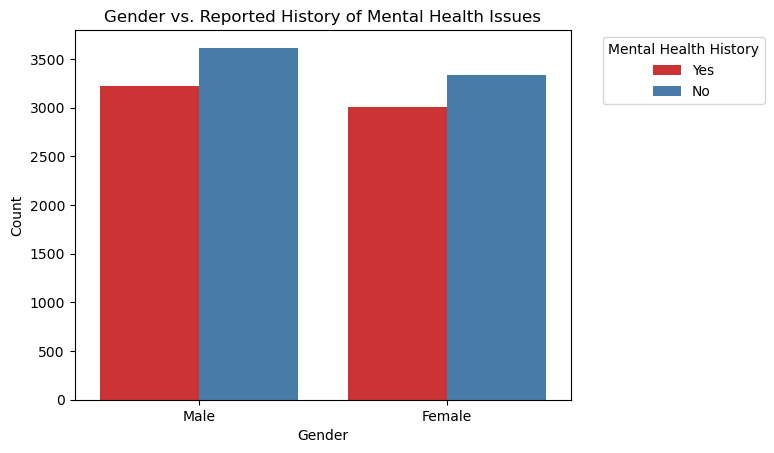

In [35]:
sns.barplot(data=gender_mental_health, x='Gender', y='Count', hue='Mental_Health_History', palette='Set1')
plt.title('Gender vs. Reported History of Mental Health Issues')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Mental Health History', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

#gender_percentage_male = gender_mental_health['Count'].values
#gender_percentage_male 

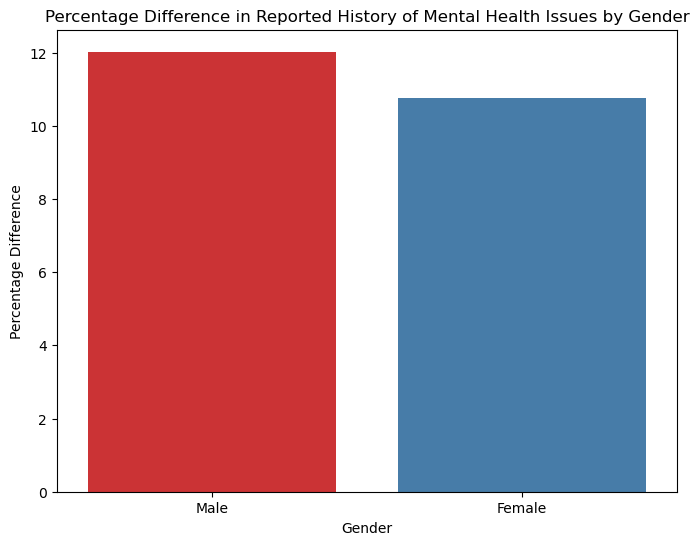

In [36]:
# Get the counts
count_male_yes = len(males_yes)
count_male_no = len(males_no)
count_female_yes = len(female_yes)
count_female_no = len(female_no)

# Calculate percentage differences
percentage_diff_male = ((count_male_no - count_male_yes) / count_male_yes) * 100
percentage_diff_female = ((count_female_no - count_female_yes) / count_female_yes) * 100

# Create a DataFrame to hold this data for visualization
data = {
    'Gender': ['Male', 'Female'],
    'Percentage Difference': [percentage_diff_male, percentage_diff_female]
}

percentage_diff_df = pd.DataFrame(data)

# Plotting the data
plt.figure(figsize=(8, 6))
sns.barplot(data=percentage_diff_df, x='Gender', y='Percentage Difference', palette='Set1')
plt.title('Percentage Difference in Reported History of Mental Health Issues by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage Difference')
plt.show()


In [57]:
# Descriptive statistics for Mental_Health_History by Gender
filtered_df = short_df[short_df['Mental_Health_History'] != 'Maybe']
gender_mental_health_counts = filtered_df.groupby(['Gender', 'Mental_Health_History']).size().unstack(fill_value=0)
gender_mental_health_counts



Mental_Health_History,No,Yes
Gender,,
Female,3331,3007
Male,3614,3226


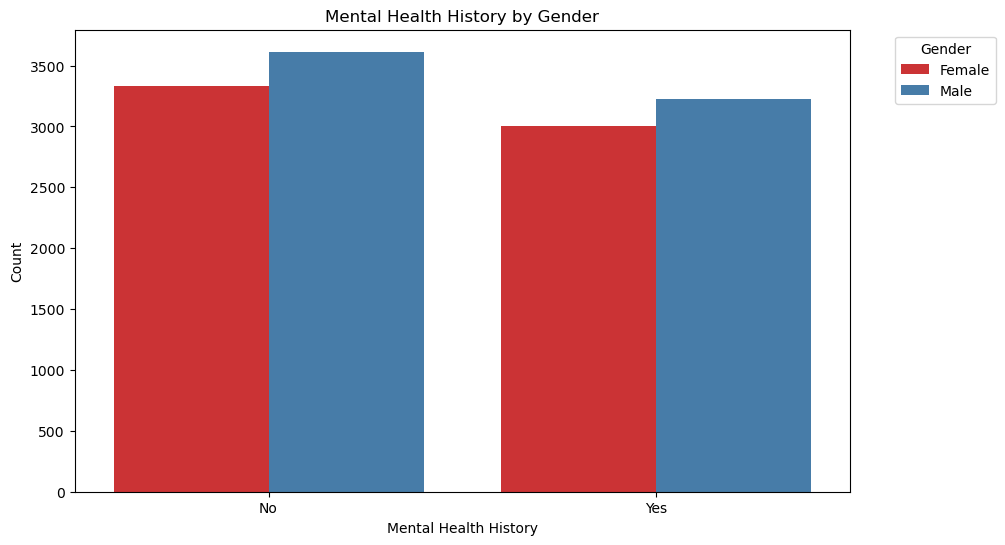

In [70]:
# Bar plot to show counts of Mental_Health_History by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='Mental_Health_History', hue='Gender', palette='Set1')
plt.title('Mental Health History by Gender')
plt.xlabel('Mental Health History')
plt.ylabel('Count')
plt.legend(title='Gender', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

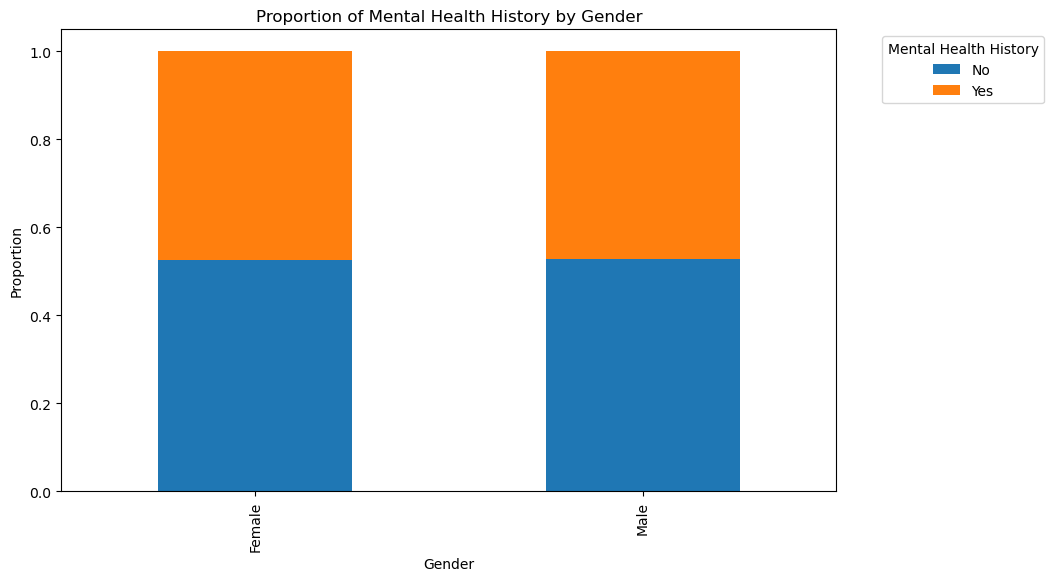

In [74]:
# Filter out the rows where 'Mental_Health_History' is 'Maybe'
filtered_df = short_df[short_df['Mental_Health_History'] != 'Maybe']

# Create a count DataFrame
gender_mental_health_counts = filtered_df.groupby(['Gender', 'Mental_Health_History']).size().unstack()

# Calculate proportions
gender_mental_health_proportions = gender_mental_health_counts.div(gender_mental_health_counts.sum(axis=1), axis=0)

# Plot proportions
gender_mental_health_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Mental Health History by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(title='Mental Health History', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

In [66]:
from scipy.stats import chi2_contingency

# Perform Chi-Squared test
chi2_stat, p_val, dof, expected = chi2_contingency(gender_mental_health_proportions)
print(f"Chi-Squared Statistic: {chi2_stat}")
print(f"P-value: {p_val}")

# Interpretation
if p_val < 0.05:
    print("There is a significant association between gender and mental health history.")
else:
    print("There is no significant association between gender and mental health history.")

Chi-Squared Statistic: 0.0
P-value: 1.0
There is no significant association between gender and mental health history.


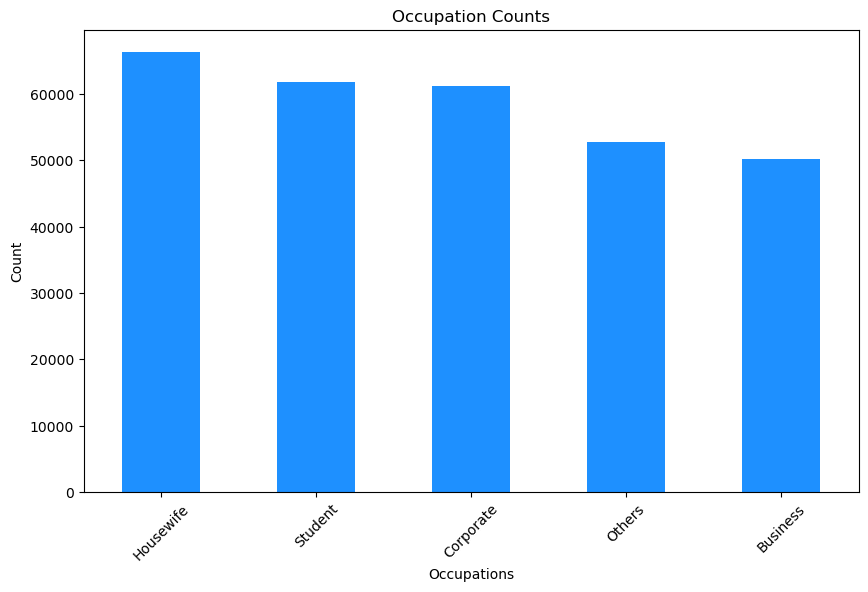

In [40]:
#determine percentage of unique occupations
occupation_count = df_main['Occupation'].value_counts()

#occupation_count.plot(kind='pie', )

plt.figure(figsize=(10, 6))
occupation_count.plot(kind='bar', color='dodgerblue')
plt.title('Occupation Counts')
plt.xlabel('Occupations')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [41]:
mental_health_history = pd.DataFrame(df_main['Mental_Health_History'].value_counts())
mental_health_history

,count
Mental_Health_History,
No,104018
Maybe,95378
Yes,92968


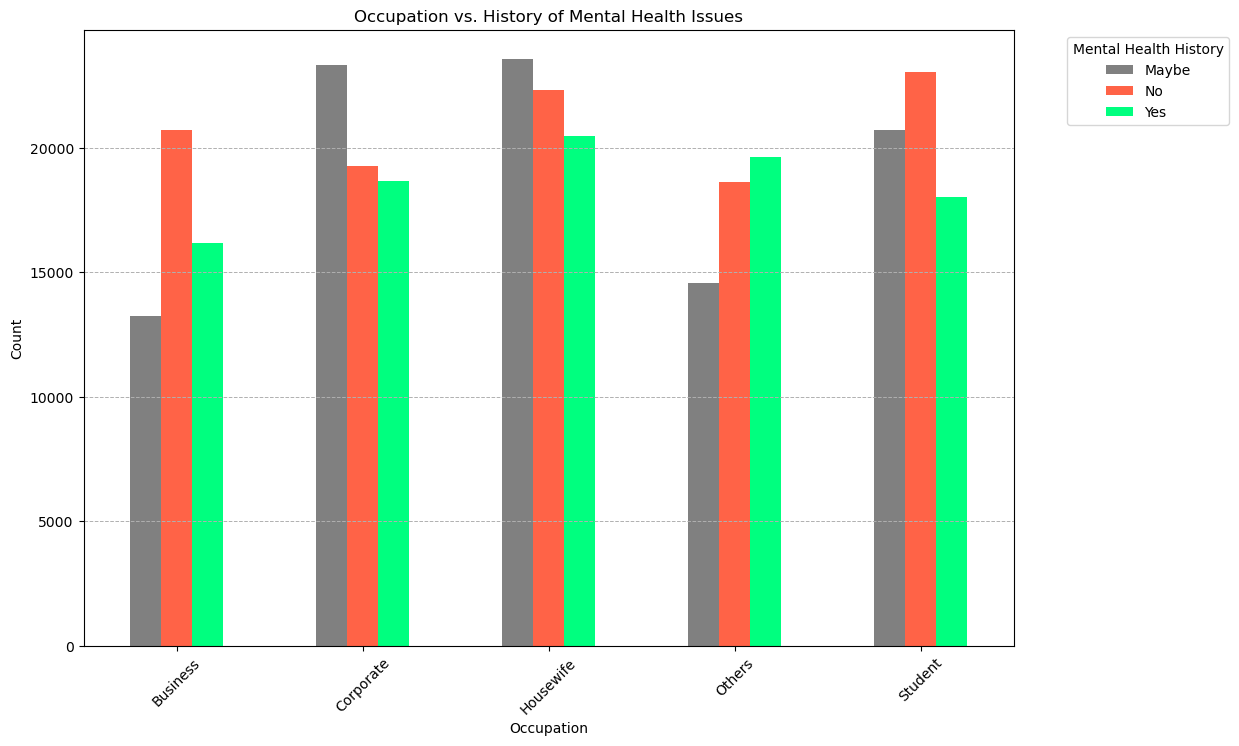

Mental_Health_History,Maybe,No,Yes
Occupation,,,
Business,13228,20729,16192
Corporate,23310,19267,18652
Housewife,23552,22322,20477
Others,14579,18642,19620
Student,20709,23058,18027


In [82]:
# Grouping by 'Occupation' and 'Mental_Health_History', then counting occurrences
occupation_mh_counts = df_main.groupby(['Occupation', 'Mental_Health_History']).size().unstack(fill_value=0)

# Plotting the data
occupation_mh_counts.plot(kind='bar', figsize=(12, 8), color=['grey', 'tomato', 'springgreen'])
plt.title('Occupation vs. History of Mental Health Issues')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(title='Mental Health History', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

occupation_mh_counts

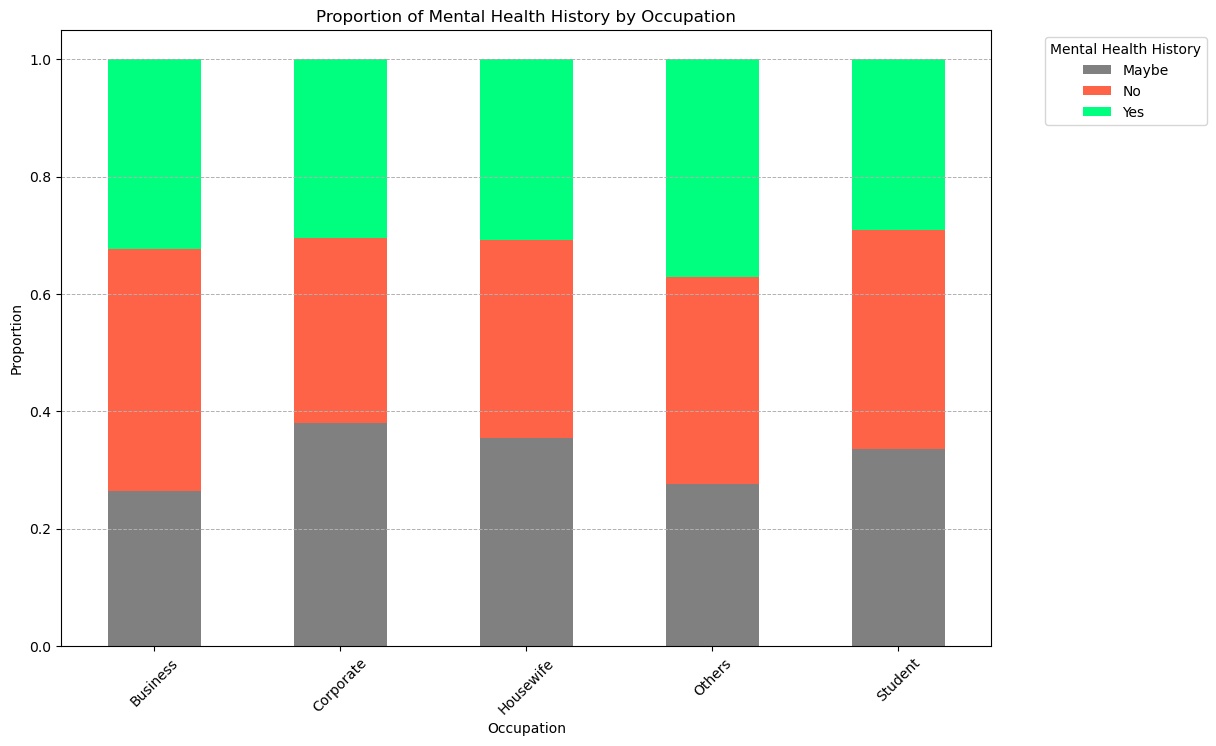

Mental_Health_History,Maybe,No,Yes
Occupation,,,
Business,0.263774,0.413348,0.322878
Corporate,0.380702,0.314671,0.304627
Housewife,0.354961,0.336423,0.308616
Others,0.275903,0.352794,0.371303
Student,0.335130,0.373143,0.291727


In [83]:
# Grouping by 'Occupation' and 'Mental_Health_History', then counting occurrences
occupation_mh_counts = df_main.groupby(['Occupation', 'Mental_Health_History']).size().unstack(fill_value=0)

# Normalize the counts to proportions
occupation_mh_proportions = occupation_mh_counts.div(occupation_mh_counts.sum(axis=1), axis=0)

# Plotting the proportions
occupation_mh_proportions.plot(kind='bar', stacked=True, figsize=(12, 8), color=['grey', 'tomato', 'springgreen'])
plt.title('Proportion of Mental Health History by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(title='Mental Health History', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

occupation_mh_proportions


In [81]:
from scipy.stats import chi2_contingency

# Perform Chi-Squared test
chi2_stat, p_val, dof, expected = chi2_contingency(occupation_mh_proportions)
print(f"Chi-Squared Statistic: {chi2_stat}")
print(f"P-value: {p_val}")

# Interpretation
if p_val < 0.05:
    print("There is a significant association between gender and mental health history.")
else:
    print("There is no significant association between gender and mental health history.")

Chi-Squared Statistic: 0.0594419312603835
P-value: 0.999999968251777
There is no significant association between gender and mental health history.
